In [1]:
import torch
import numpy as np
import pandas as pd
import os
import sys
import multiprocessing
import importlib
import image_set  # 图片数据集实现类
import model_manager
import image_classification  # 分类模型实现类


# 处理思路：数据处理（引用函数dataset）->模型实例化、损失函数、优化器->
# dataloader构造->循环训练模型（寻找参数）

# 如果自定义的模块代码改变，需要reload
importlib.reload(image_set)
importlib.reload(model_manager)
importlib.reload(image_classification)

TRAIN_DIR = "./data/training"
VALIDATION_DIR = "./data/validation"
TEST_DIR = "./data/testing"
TEST_REULST_PATH = "./data/result.csv"

# 用以对cpu和GPU进行兼容
use_cuda = True & torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Use Cuda." if use_cuda else "Use cpu.")


Use Cuda.


In [2]:
def CalcRightCount(y, t):
    # 计算预测正确的数量，y、t均为numpy一维数组
    count = 0
    for i in range(y.shape[0]):
        if y[i] == t[i]:
            count += 1
    return count


def validate(data_loader, m):
    m.eval()  # 会关闭dropout、batchnorm等
    right_count = 0
    with torch.no_grad():  # 不构建计算图
        for _, info in enumerate(data_loader):
            images, labels = info
            images, labels = images.to(device), labels.to(device)
            y_pred = m(images).squeeze()
            right_count += CalcRightCount(np.argmax(y_pred.cpu().numpy(), 1), labels.cpu().numpy())
            del images, labels, y_pred
            torch.cuda.empty_cache()
    return right_count

In [3]:
# 指定模型类别并实例化模型

model_class = image_classification.GYHF_LetNet5#选择模型类型

# 训练数据集
data_train = image_set.LearningSet(TRAIN_DIR, model_class.input_size)
class_count = data_train.GetClassNum()  # 获取类别数量

# 模型实例化
SAVE_PATH = str(model_class) + ".pkl"
if os.path.exists(SAVE_PATH):
    print("model has been loaded from file.")
    model = torch.load(SAVE_PATH)
else:
    print("create a new model.")
    model = model_class(class_count)

model = model.to(device)

create a new model.


In [4]:
# 验证集数据加载
nbatch_predict = 128
# 训练数据验证
data_validation1 = image_set.LearningSet(TRAIN_DIR, model.input_size, False)
data_loader_validation1 = torch.utils.data.DataLoader(
    data_validation1,
    nbatch_predict,
    shuffle=False,
    num_workers=multiprocessing.cpu_count(),
)
# 验证集数据验证
data_validation2 = image_set.LearningSet(VALIDATION_DIR, model.input_size, False)
data_loader_validation2 = torch.utils.data.DataLoader(
    data_validation2,
    nbatch_predict,
    shuffle=False,
    num_workers=multiprocessing.cpu_count(),
)

waiting for training...
iters  0  ...
1280 images input, avarage loss: 2.365630 , duration: 1.331925
2560 images input, avarage loss: 2.329269 , duration: 1.337452
3840 images input, avarage loss: 2.294547 , duration: 0.899910
5120 images input, avarage loss: 2.270358 , duration: 1.130789
6400 images input, avarage loss: 2.251570 , duration: 1.309864
7680 images input, avarage loss: 2.234188 , duration: 1.767226
8960 images input, avarage loss: 2.219997 , duration: 0.605192
[epochs  1 / 5 ] loss: 2.208755 duration: 9.467892
1280 images input, avarage loss: 2.118885 , duration: 1.379717
2560 images input, avarage loss: 2.131038 , duration: 1.199408
3840 images input, avarage loss: 2.117337 , duration: 1.250915
5120 images input, avarage loss: 2.105151 , duration: 1.137640
6400 images input, avarage loss: 2.101602 , duration: 0.971038
7680 images input, avarage loss: 2.097794 , duration: 0.870862
8960 images input, avarage loss: 2.085164 , duration: 1.551037
[epochs  2 / 5 ] loss: 2.0795

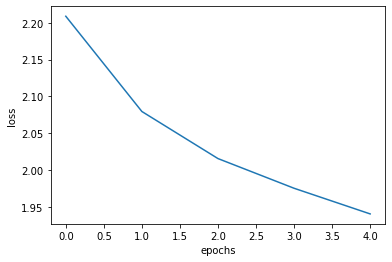

waiting for validation...
train accuracy: 33.45834177984999 %
validation accuracy: 31.457725947521865 %
iters  1  ...
1280 images input, avarage loss: 1.943757 , duration: 1.572481
2560 images input, avarage loss: 1.948891 , duration: 1.145205
3840 images input, avarage loss: 1.936254 , duration: 0.725633
5120 images input, avarage loss: 1.917648 , duration: 1.386976
6400 images input, avarage loss: 1.917170 , duration: 1.058392
7680 images input, avarage loss: 1.913941 , duration: 0.785639
8960 images input, avarage loss: 1.910476 , duration: 1.130813
[epochs  1 / 5 ] loss: 1.900329 duration: 8.533559
1280 images input, avarage loss: 1.867990 , duration: 1.467530
2560 images input, avarage loss: 1.878561 , duration: 1.134805
3840 images input, avarage loss: 1.881864 , duration: 0.738370
5120 images input, avarage loss: 1.878764 , duration: 1.160438
6400 images input, avarage loss: 1.878369 , duration: 1.675860
7680 images input, avarage loss: 1.875459 , duration: 0.946118
8960 images 

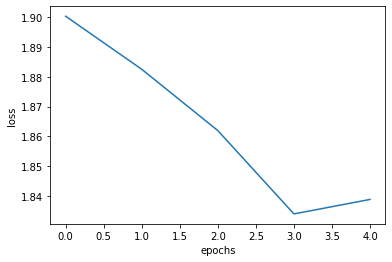

waiting for validation...
train accuracy: 37.36063247516724 %
validation accuracy: 34.69387755102041 %
iters  2  ...
1280 images input, avarage loss: 1.814817 , duration: 1.828783
2560 images input, avarage loss: 1.811556 , duration: 1.005595
3840 images input, avarage loss: 1.815649 , duration: 0.949783
5120 images input, avarage loss: 1.814451 , duration: 1.326882
6400 images input, avarage loss: 1.816445 , duration: 1.009550
7680 images input, avarage loss: 1.813100 , duration: 0.897077
8960 images input, avarage loss: 1.807352 , duration: 1.196408
[epochs  1 / 5 ] loss: 1.813816 duration: 8.779836
1280 images input, avarage loss: 1.832161 , duration: 1.856979
2560 images input, avarage loss: 1.815437 , duration: 1.204256
3840 images input, avarage loss: 1.817341 , duration: 0.595528
5120 images input, avarage loss: 1.797908 , duration: 1.082768
6400 images input, avarage loss: 1.801871 , duration: 1.665142
7680 images input, avarage loss: 1.805517 , duration: 0.685729
8960 images i

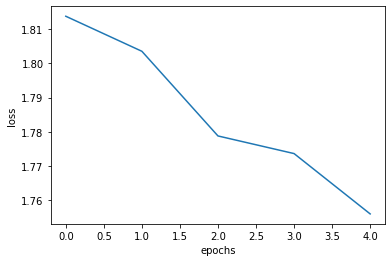

waiting for validation...
train accuracy: 39.10399351307521 %
validation accuracy: 36.93877551020408 %
iters  3  ...
1280 images input, avarage loss: 1.746897 , duration: 1.506192
2560 images input, avarage loss: 1.745467 , duration: 1.149154
3840 images input, avarage loss: 1.744684 , duration: 0.812681
5120 images input, avarage loss: 1.743151 , duration: 1.343046
6400 images input, avarage loss: 1.745872 , duration: 0.840050
7680 images input, avarage loss: 1.749044 , duration: 1.226029
8960 images input, avarage loss: 1.752614 , duration: 1.310124
[epochs  1 / 5 ] loss: 1.752011 duration: 8.910272
1280 images input, avarage loss: 1.733359 , duration: 1.537038
2560 images input, avarage loss: 1.731898 , duration: 1.513389
3840 images input, avarage loss: 1.746080 , duration: 1.318810
5120 images input, avarage loss: 1.745351 , duration: 1.764119
6400 images input, avarage loss: 1.739524 , duration: 1.084426
7680 images input, avarage loss: 1.730015 , duration: 1.232650
8960 images i

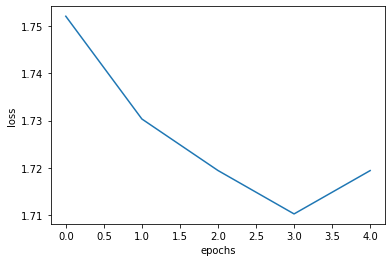

waiting for validation...
train accuracy: 41.40482465031421 %
validation accuracy: 38.10495626822158 %
iters  4  ...
1280 images input, avarage loss: 1.659332 , duration: 2.920154
2560 images input, avarage loss: 1.686242 , duration: 1.767421
3840 images input, avarage loss: 1.691025 , duration: 2.337314
5120 images input, avarage loss: 1.685992 , duration: 2.802190
6400 images input, avarage loss: 1.686556 , duration: 2.514865
7680 images input, avarage loss: 1.691230 , duration: 1.560303
8960 images input, avarage loss: 1.692985 , duration: 2.453014
[epochs  1 / 5 ] loss: 1.694570 duration: 17.153958
1280 images input, avarage loss: 1.670925 , duration: 3.230346
2560 images input, avarage loss: 1.656048 , duration: 2.369841
3840 images input, avarage loss: 1.658386 , duration: 2.020588
5120 images input, avarage loss: 1.662602 , duration: 2.510613
6400 images input, avarage loss: 1.661692 , duration: 1.234869
7680 images input, avarage loss: 1.662995 , duration: 2.555853
8960 images 

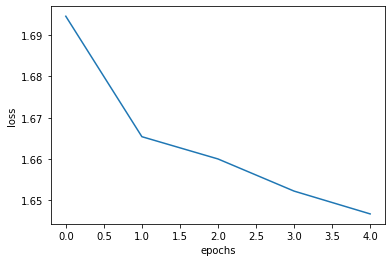

waiting for validation...
train accuracy: 42.95560510845328 %
validation accuracy: 37.988338192419825 %
iters  5  ...
1280 images input, avarage loss: 1.662985 , duration: 3.468136
2560 images input, avarage loss: 1.650657 , duration: 2.039315
3840 images input, avarage loss: 1.658439 , duration: 1.417074
5120 images input, avarage loss: 1.656873 , duration: 3.809295
6400 images input, avarage loss: 1.656208 , duration: 1.999145
7680 images input, avarage loss: 1.649805 , duration: 0.739615
8960 images input, avarage loss: 1.649738 , duration: 1.102262
[epochs  1 / 5 ] loss: 1.639711 duration: 15.229429
1280 images input, avarage loss: 1.607954 , duration: 1.814406
2560 images input, avarage loss: 1.608653 , duration: 1.025575
3840 images input, avarage loss: 1.601632 , duration: 1.170662
5120 images input, avarage loss: 1.613592 , duration: 1.365346
6400 images input, avarage loss: 1.617949 , duration: 1.808244
7680 images input, avarage loss: 1.622076 , duration: 0.986740
8960 images

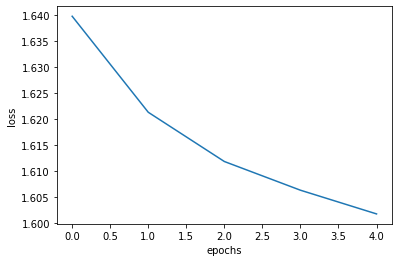

waiting for validation...
train accuracy: 45.11453476586256 %
validation accuracy: 39.12536443148688 %
iters  6  ...
1280 images input, avarage loss: 1.611636 , duration: 1.529697
2560 images input, avarage loss: 1.623365 , duration: 1.733582
3840 images input, avarage loss: 1.624277 , duration: 0.745703
5120 images input, avarage loss: 1.607338 , duration: 1.801123
6400 images input, avarage loss: 1.609024 , duration: 1.190031
7680 images input, avarage loss: 1.602638 , duration: 0.709023
8960 images input, avarage loss: 1.596732 , duration: 1.163180
[epochs  1 / 5 ] loss: 1.595794 duration: 9.406975
1280 images input, avarage loss: 1.551151 , duration: 1.558281
2560 images input, avarage loss: 1.540343 , duration: 1.155949
3840 images input, avarage loss: 1.550126 , duration: 0.591873
5120 images input, avarage loss: 1.560668 , duration: 1.415526
6400 images input, avarage loss: 1.561002 , duration: 1.214340
7680 images input, avarage loss: 1.557913 , duration: 0.883350
8960 images i

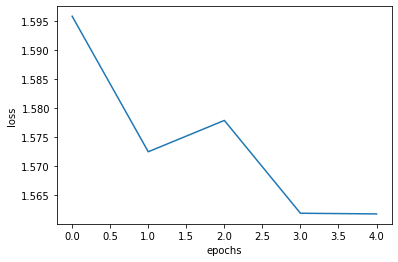

waiting for validation...
train accuracy: 47.49645246300426 %
validation accuracy: 40.116618075801746 %
iters  7  ...
1280 images input, avarage loss: 1.577042 , duration: 1.467107
2560 images input, avarage loss: 1.576039 , duration: 1.347432
3840 images input, avarage loss: 1.563394 , duration: 0.782719
5120 images input, avarage loss: 1.563147 , duration: 1.348976
6400 images input, avarage loss: 1.555662 , duration: 1.110310
7680 images input, avarage loss: 1.554098 , duration: 0.816688
8960 images input, avarage loss: 1.554225 , duration: 1.378540
[epochs  1 / 5 ] loss: 1.553921 duration: 8.805504
1280 images input, avarage loss: 1.524792 , duration: 1.574284
2560 images input, avarage loss: 1.530607 , duration: 1.528188
3840 images input, avarage loss: 1.535237 , duration: 1.063388
5120 images input, avarage loss: 1.529109 , duration: 1.121677
6400 images input, avarage loss: 1.538171 , duration: 1.348782
7680 images input, avarage loss: 1.531893 , duration: 1.082837
8960 images 

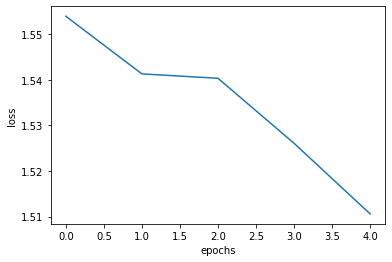

waiting for validation...
train accuracy: 49.43239408068113 %
validation accuracy: 40.524781341107875 %
iters  8  ...
1280 images input, avarage loss: 1.561289 , duration: 1.655326
2560 images input, avarage loss: 1.538024 , duration: 1.170474
3840 images input, avarage loss: 1.536471 , duration: 0.679466
5120 images input, avarage loss: 1.538415 , duration: 1.589357
6400 images input, avarage loss: 1.529376 , duration: 1.299127
7680 images input, avarage loss: 1.530613 , duration: 0.614923
8960 images input, avarage loss: 1.521509 , duration: 1.370048
[epochs  1 / 5 ] loss: 1.510364 duration: 9.050019
1280 images input, avarage loss: 1.478936 , duration: 1.538267
2560 images input, avarage loss: 1.489804 , duration: 1.285605
3840 images input, avarage loss: 1.489825 , duration: 0.642692
5120 images input, avarage loss: 1.482174 , duration: 1.533850
6400 images input, avarage loss: 1.484916 , duration: 1.265931
7680 images input, avarage loss: 1.487607 , duration: 0.641076
8960 images 

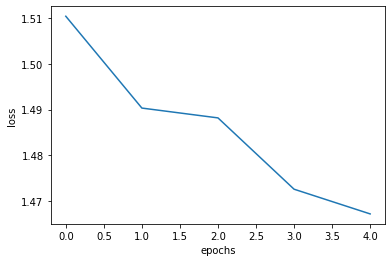

waiting for validation...
train accuracy: 50.56760591931887 %
validation accuracy: 41.42857142857143 %
iters  9  ...
1280 images input, avarage loss: 1.487857 , duration: 1.540865
2560 images input, avarage loss: 1.500506 , duration: 1.106238
3840 images input, avarage loss: 1.495539 , duration: 0.777587
5120 images input, avarage loss: 1.488015 , duration: 1.291721
6400 images input, avarage loss: 1.479327 , duration: 0.754636
7680 images input, avarage loss: 1.483555 , duration: 1.351489
8960 images input, avarage loss: 1.478339 , duration: 1.353825
[epochs  1 / 5 ] loss: 1.479776 duration: 8.758561
1280 images input, avarage loss: 1.510461 , duration: 2.173725
2560 images input, avarage loss: 1.497773 , duration: 1.307506
3840 images input, avarage loss: 1.491642 , duration: 0.749957
5120 images input, avarage loss: 1.469919 , duration: 1.097310
6400 images input, avarage loss: 1.468597 , duration: 1.064006
7680 images input, avarage loss: 1.457491 , duration: 0.665605
8960 images i

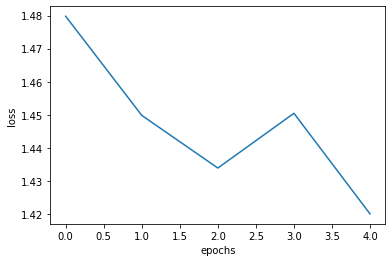

waiting for validation...
train accuracy: 52.189337117372794 %
validation accuracy: 40.116618075801746 %
iters  10  ...
1280 images input, avarage loss: 1.478467 , duration: 1.551747
2560 images input, avarage loss: 1.448466 , duration: 1.284585
3840 images input, avarage loss: 1.433795 , duration: 0.788959
5120 images input, avarage loss: 1.433435 , duration: 1.743247
6400 images input, avarage loss: 1.436751 , duration: 1.313067
7680 images input, avarage loss: 1.427635 , duration: 0.870070
8960 images input, avarage loss: 1.427339 , duration: 1.178078
[epochs  1 / 5 ] loss: 1.430010 duration: 9.346018
1280 images input, avarage loss: 1.370774 , duration: 1.477455
2560 images input, avarage loss: 1.389437 , duration: 1.263011
3840 images input, avarage loss: 1.395520 , duration: 0.869581
5120 images input, avarage loss: 1.390161 , duration: 1.418002
6400 images input, avarage loss: 1.392024 , duration: 1.178362
7680 images input, avarage loss: 1.400606 , duration: 1.220697
8960 image

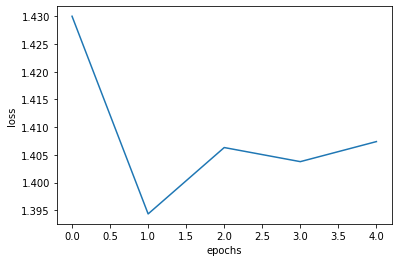

waiting for validation...
train accuracy: 54.99695925400365 %
validation accuracy: 40.670553935860056 %
iters  11  ...
1280 images input, avarage loss: 1.368039 , duration: 1.585370
2560 images input, avarage loss: 1.382031 , duration: 1.049059
3840 images input, avarage loss: 1.386850 , duration: 0.846050
5120 images input, avarage loss: 1.394259 , duration: 1.209935
6400 images input, avarage loss: 1.397953 , duration: 1.044857
7680 images input, avarage loss: 1.398408 , duration: 0.883558
8960 images input, avarage loss: 1.392555 , duration: 0.994394
[epochs  1 / 5 ] loss: 1.387942 duration: 8.588145
1280 images input, avarage loss: 1.368415 , duration: 1.673994
2560 images input, avarage loss: 1.365950 , duration: 1.591584
3840 images input, avarage loss: 1.355901 , duration: 0.588842
5120 images input, avarage loss: 1.371210 , duration: 1.221956
6400 images input, avarage loss: 1.370593 , duration: 1.414562
7680 images input, avarage loss: 1.376303 , duration: 0.649798
8960 images

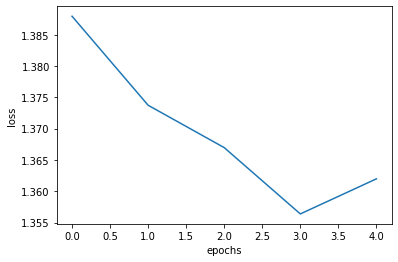

waiting for validation...
train accuracy: 53.16237583620515 %
validation accuracy: 39.533527696793 %
iters  12  ...
1280 images input, avarage loss: 1.408883 , duration: 1.782200
2560 images input, avarage loss: 1.376273 , duration: 1.027516
3840 images input, avarage loss: 1.381681 , duration: 1.420246
5120 images input, avarage loss: 1.371477 , duration: 1.218111
6400 images input, avarage loss: 1.367191 , duration: 1.010651
7680 images input, avarage loss: 1.371866 , duration: 1.095348
8960 images input, avarage loss: 1.372656 , duration: 1.350809
[epochs  1 / 5 ] loss: 1.358718 duration: 9.525191
1280 images input, avarage loss: 1.259295 , duration: 1.440050
2560 images input, avarage loss: 1.293281 , duration: 1.796818
3840 images input, avarage loss: 1.312955 , duration: 0.749821
5120 images input, avarage loss: 1.330304 , duration: 1.425507
6400 images input, avarage loss: 1.328187 , duration: 1.264709
7680 images input, avarage loss: 1.332722 , duration: 0.726456
8960 images in

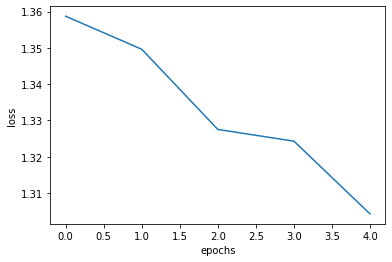

waiting for validation...
train accuracy: 56.31461585242246 %
validation accuracy: 39.416909620991255 %
iters  13  ...
1280 images input, avarage loss: 1.335137 , duration: 1.893411
2560 images input, avarage loss: 1.354517 , duration: 1.303226
3840 images input, avarage loss: 1.327089 , duration: 1.253505
5120 images input, avarage loss: 1.332166 , duration: 1.267809
6400 images input, avarage loss: 1.337905 , duration: 1.185157
7680 images input, avarage loss: 1.337125 , duration: 0.713582
8960 images input, avarage loss: 1.335461 , duration: 1.088731
[epochs  1 / 5 ] loss: 1.333532 duration: 9.334624
1280 images input, avarage loss: 1.311674 , duration: 1.527214
2560 images input, avarage loss: 1.313126 , duration: 1.201715
3840 images input, avarage loss: 1.316012 , duration: 0.720157
5120 images input, avarage loss: 1.297337 , duration: 1.210009
6400 images input, avarage loss: 1.310449 , duration: 1.183027
7680 images input, avarage loss: 1.303050 , duration: 0.740458
8960 images

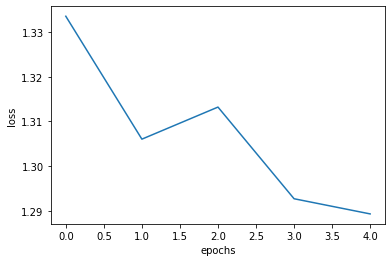

waiting for validation...
train accuracy: 55.53415771335901 %
validation accuracy: 39.475218658892125 %
iters  14  ...
1280 images input, avarage loss: 1.254881 , duration: 1.464189
2560 images input, avarage loss: 1.269487 , duration: 1.406904
3840 images input, avarage loss: 1.281418 , duration: 0.705190
5120 images input, avarage loss: 1.273412 , duration: 1.409841
6400 images input, avarage loss: 1.282363 , duration: 1.387427
7680 images input, avarage loss: 1.285979 , duration: 1.352897
8960 images input, avarage loss: 1.290709 , duration: 1.195933
[epochs  1 / 5 ] loss: 1.288634 duration: 9.514400
1280 images input, avarage loss: 1.264152 , duration: 1.618953
2560 images input, avarage loss: 1.253773 , duration: 1.524290
3840 images input, avarage loss: 1.261407 , duration: 0.879368
5120 images input, avarage loss: 1.268120 , duration: 1.177754
6400 images input, avarage loss: 1.266952 , duration: 1.315009
7680 images input, avarage loss: 1.268715 , duration: 0.606021
8960 images

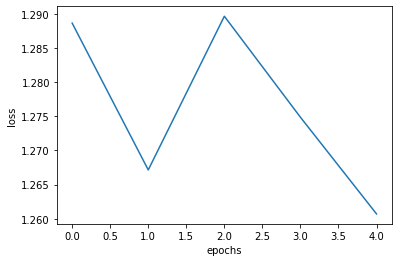

waiting for validation...
train accuracy: 58.8181633894182 %
validation accuracy: 39.67930029154519 %
iters  15  ...
1280 images input, avarage loss: 1.263067 , duration: 1.494941
2560 images input, avarage loss: 1.262769 , duration: 1.254399
3840 images input, avarage loss: 1.253993 , duration: 0.929823
5120 images input, avarage loss: 1.265517 , duration: 1.209044
6400 images input, avarage loss: 1.261067 , duration: 1.342434
7680 images input, avarage loss: 1.261181 , duration: 0.684116
8960 images input, avarage loss: 1.261487 , duration: 1.242161
[epochs  1 / 5 ] loss: 1.257720 duration: 9.152519
1280 images input, avarage loss: 1.213045 , duration: 1.803006
2560 images input, avarage loss: 1.221264 , duration: 2.058435
3840 images input, avarage loss: 1.231641 , duration: 0.692891
5120 images input, avarage loss: 1.236332 , duration: 1.215160
6400 images input, avarage loss: 1.237053 , duration: 1.771788
7680 images input, avarage loss: 1.244263 , duration: 0.622502
8960 images i

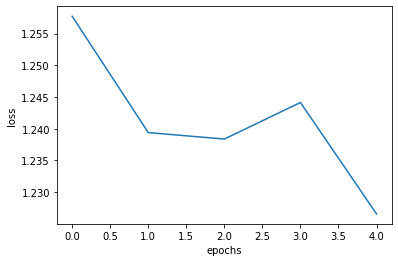

waiting for validation...
train accuracy: 60.83519156699777 %
validation accuracy: 38.71720116618076 %
iters  16  ...
1280 images input, avarage loss: 1.251131 , duration: 1.724129
2560 images input, avarage loss: 1.234857 , duration: 1.281469
3840 images input, avarage loss: 1.249145 , duration: 1.160072
5120 images input, avarage loss: 1.250153 , duration: 1.208179
6400 images input, avarage loss: 1.248059 , duration: 1.342894
7680 images input, avarage loss: 1.240068 , duration: 0.698256
8960 images input, avarage loss: 1.237527 , duration: 1.410861
[epochs  1 / 5 ] loss: 1.237841 duration: 9.590157
1280 images input, avarage loss: 1.206781 , duration: 1.684239
2560 images input, avarage loss: 1.191363 , duration: 1.393144
3840 images input, avarage loss: 1.190704 , duration: 0.895814
5120 images input, avarage loss: 1.208069 , duration: 1.352583
6400 images input, avarage loss: 1.210292 , duration: 1.378450
7680 images input, avarage loss: 1.213587 , duration: 0.683548
8960 images 

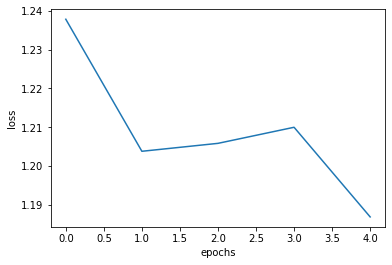

waiting for validation...
train accuracy: 59.04115142915062 %
validation accuracy: 37.8134110787172 %
iters  17  ...
1280 images input, avarage loss: 1.184754 , duration: 1.418798
2560 images input, avarage loss: 1.216537 , duration: 1.143311
3840 images input, avarage loss: 1.232393 , duration: 1.049785
5120 images input, avarage loss: 1.221201 , duration: 1.583474
6400 images input, avarage loss: 1.217282 , duration: 0.914997
7680 images input, avarage loss: 1.212942 , duration: 1.026697
8960 images input, avarage loss: 1.216428 , duration: 1.138152
[epochs  1 / 5 ] loss: 1.222167 duration: 9.040541
1280 images input, avarage loss: 1.185671 , duration: 1.497910
2560 images input, avarage loss: 1.199282 , duration: 1.085054
3840 images input, avarage loss: 1.200048 , duration: 0.809984
5120 images input, avarage loss: 1.185519 , duration: 1.460812
6400 images input, avarage loss: 1.172558 , duration: 1.171978
7680 images input, avarage loss: 1.177965 , duration: 1.323156
8960 images i

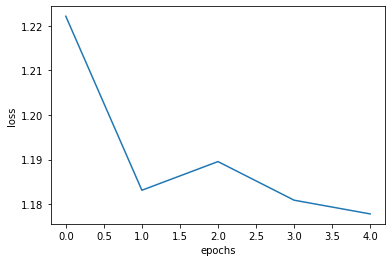

waiting for validation...
train accuracy: 63.267788364078655 %
validation accuracy: 37.87172011661808 %
iters  18  ...
1280 images input, avarage loss: 1.146116 , duration: 1.515522
2560 images input, avarage loss: 1.164826 , duration: 1.304527
3840 images input, avarage loss: 1.171614 , duration: 0.636259
5120 images input, avarage loss: 1.166356 , duration: 1.260305
6400 images input, avarage loss: 1.165986 , duration: 1.234412
7680 images input, avarage loss: 1.159393 , duration: 1.704654
8960 images input, avarage loss: 1.164096 , duration: 0.594807
[epochs  1 / 5 ] loss: 1.157704 duration: 8.843085
1280 images input, avarage loss: 1.195944 , duration: 1.589258
2560 images input, avarage loss: 1.176706 , duration: 1.371474
3840 images input, avarage loss: 1.171548 , duration: 0.767953
5120 images input, avarage loss: 1.163940 , duration: 1.239789
6400 images input, avarage loss: 1.165601 , duration: 1.239360
7680 images input, avarage loss: 1.160693 , duration: 1.324982
8960 images

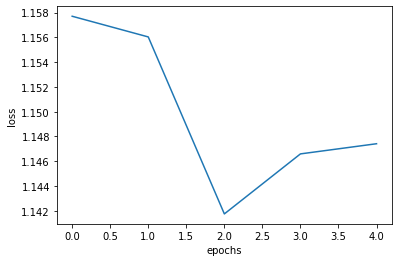

waiting for validation...
train accuracy: 62.86235556456517 %
validation accuracy: 36.93877551020408 %
iters  19  ...
1280 images input, avarage loss: 1.153528 , duration: 1.693201
2560 images input, avarage loss: 1.174355 , duration: 0.952231
3840 images input, avarage loss: 1.176640 , duration: 0.992581
5120 images input, avarage loss: 1.156295 , duration: 1.564431
6400 images input, avarage loss: 1.158870 , duration: 0.959962
7680 images input, avarage loss: 1.161653 , duration: 0.916587
8960 images input, avarage loss: 1.158737 , duration: 1.077747
[epochs  1 / 5 ] loss: 1.157861 duration: 9.094615
1280 images input, avarage loss: 1.123356 , duration: 1.405787
2560 images input, avarage loss: 1.142221 , duration: 1.240078
3840 images input, avarage loss: 1.132977 , duration: 0.699588
5120 images input, avarage loss: 1.115512 , duration: 1.189347
6400 images input, avarage loss: 1.112952 , duration: 1.144706
7680 images input, avarage loss: 1.120067 , duration: 1.198139
8960 images 

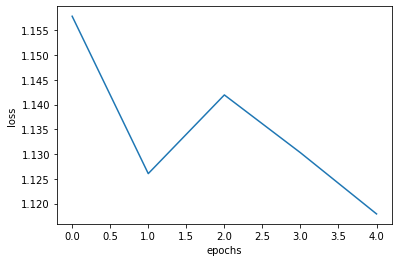

waiting for validation...
train accuracy: 63.33873910399351 %
validation accuracy: 36.734693877551024 %


In [5]:
# 训练模型
print("waiting for training...")
for i in range(20):
    print("iters ", i, " ...")
    model = model_manager.train_model(
        model,
        data_train,
        device=device,
        epochs=5,
        nbatch=128,  # 可根据显存和模型大小来调整batchsize的大小
        lr=0.001,
        weight_decay=0,
        opt=0,
    )
    with torch.no_grad():
        # 每5轮保存一次模型，同时验证一下正确率
        # 模型保存
        torch.save(model, SAVE_PATH)
        # 用验证集和训练集验证:
        print("waiting for validation...")
        train_accuracy = 100 * validate(data_loader_validation1, model) / data_validation1.GetLen()
        print("train accuracy:", train_accuracy, "%")
        validation_accuracy = 100 * validate(data_loader_validation2, model) / data_validation2.GetLen()
        print("validation accuracy:", validation_accuracy, "%")

In [6]:
# 测试集结果输出
model.eval()
data_test = image_set.TestingSet(TEST_DIR, model.input_size)
data_loader_test = torch.utils.data.DataLoader(data_test, nbatch_predict, shuffle=False, num_workers=multiprocessing.cpu_count())
y_test = []
print("waiting for testing...")
with torch.no_grad():
    for i, images in enumerate(data_loader_test):
        images = images.to(device)
        y_pred = model(images).cpu().squeeze()
        # 获得类别，即最大元素下标
        y_test.extend(list(np.argmax(y_pred.numpy(), 1)))
        del images, y_pred
        torch.cuda.empty_cache()
# 测试结果存入文件
pd.DataFrame({"Id": [x for x in range(data_test.GetLen())], "Category": y_test}).to_csv(TEST_REULST_PATH, index=False)
print("test result has been written into ./data/result.csv")

waiting for testing...
test result has been written into ./data/result.csv
